In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("test.csv")

In [3]:
df.head()

,name_to_be_deleted,energy,atomic_charge,pca1,pca2,pca3
0,acetaldehyde_0_015,38.145186,36.858,0.842478,-0.531219,0.067413
1,acetaldehyde_0_015,0.573634,0.500,0.463587,0.636512,-0.533631
2,acetaldehyde_0_015,0.580474,0.500,0.264339,0.540745,0.552040
3,acetaldehyde_0_015,37.980501,36.858,0.029224,0.103269,0.247301
4,acetaldehyde_0_015,75.370940,73.517,0.044843,0.049145,0.439481


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name_to_be_deleted  989 non-null    object 
 1   energy              989 non-null    float64
 2   atomic_charge       989 non-null    float64
 3   pca1                989 non-null    float64
 4   pca2                989 non-null    float64
 5   pca3                989 non-null    float64
dtypes: float64(5), object(1)
memory usage: 46.5+ KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
energy,989.0,17.711468,24.379631,0.354965,0.406026,0.410041,35.532147,75.374145
atomic_charge,989.0,18.215577,24.963846,0.500000,0.500000,0.500000,36.858000,73.517000
pca1,989.0,0.206001,0.258520,0.025522,0.039223,0.052836,0.279435,0.870424
pca2,989.0,0.122910,0.306903,-0.566914,0.040274,0.064695,0.286355,0.660723
pca3,989.0,0.110676,0.311529,-0.724663,0.081144,0.107298,0.274634,0.633616


<AxesSubplot: xlabel='atomic_charge'>

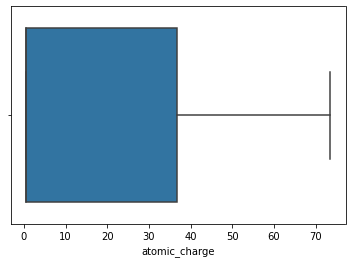

In [6]:
sns.boxplot(x=df["atomic_charge"])

<AxesSubplot: xlabel='pca1'>

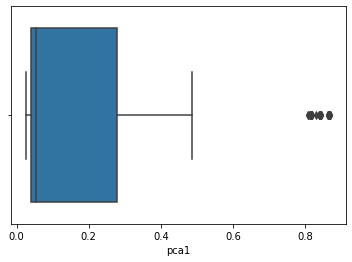

In [7]:
sns.boxplot(x=df["pca1"])



<AxesSubplot: xlabel='pca2'>

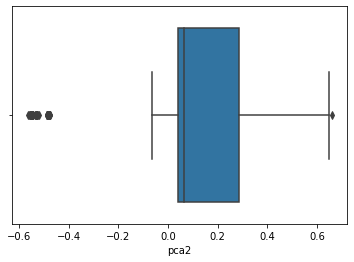

In [8]:
sns.boxplot(x=df["pca2"])

<AxesSubplot: xlabel='pca3'>

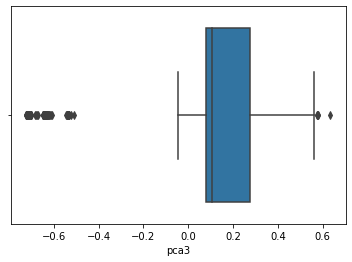

In [9]:
sns.boxplot(x=df["pca3"])

<AxesSubplot: xlabel='atomic_charge', ylabel='energy'>

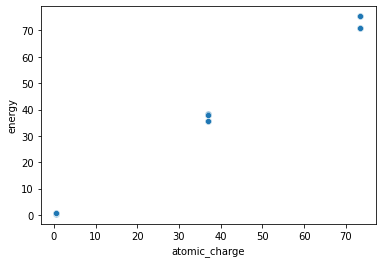

In [10]:
sns.scatterplot(data=df, x="atomic_charge", y="energy")

<AxesSubplot: xlabel='pca1', ylabel='energy'>

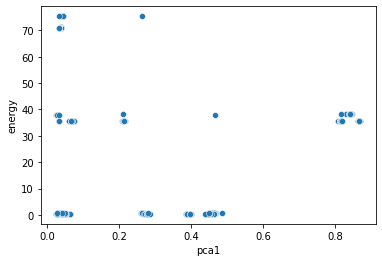

In [11]:
sns.scatterplot(data=df, x="pca1", y="energy")

<AxesSubplot: xlabel='pca2', ylabel='energy'>

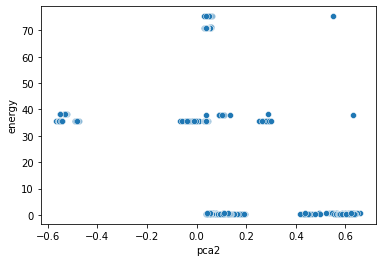

In [12]:
sns.scatterplot(data=df, x="pca2", y="energy")

<AxesSubplot: xlabel='pca3', ylabel='energy'>

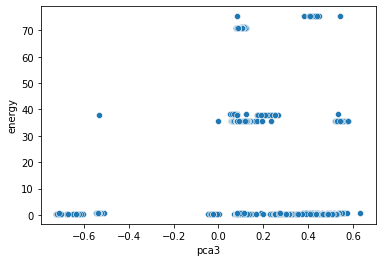

In [13]:
sns.scatterplot(data=df, x="pca3", y="energy")

<AxesSubplot: >

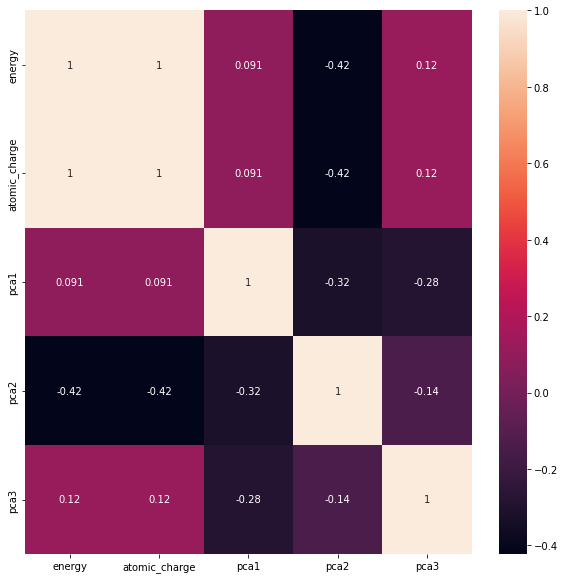

In [14]:
f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True)

In [15]:
y=df['energy']
X=df.drop(['energy','name_to_be_deleted'],axis=1)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [17]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [19]:
X_red_train = pca.fit_transform(scale(X_train))
X_red_test = pca.transform(scale(X_test))
lm = LinearRegression()
pcr = lm.fit(X_red_train, y_train)
y_pred = pcr.predict(X_red_test)

In [20]:
np.round(np.sqrt(mean_squared_error(y_test, y_pred)),2)

1.68

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_red_train, y_train)

LinearRegression()

In [22]:
y_pred = regressor.predict(X_red_test)

In [23]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 1.1917367346166503
MSE: 2.8250194928087886
RMSE: 1.6807794301480454
VarScore: 0.9957867055447449


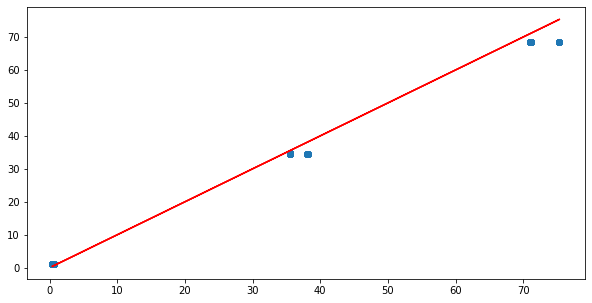

In [24]:
# Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')